Importaciones

In [91]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [92]:
df = pd.read_csv('archivo_final.csv')



C:\Users\rebec\AppData\Local\Temp\ipykernel_2524\3147295718.py:1: DtypeWarning: Columns (16,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('archivo_final.csv')


In [93]:
df.tail()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753177 entries, 0 to 753176
Data columns (total 30 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   DEPREG    753177 non-null  float64
 1   MUPREG    753177 non-null  int64  
 2   MESREG    753177 non-null  float64
 3   AÑOREG    753177 non-null  float64
 4   CLAUNI    753177 non-null  float64
 5   EDADHOM   753177 non-null  float64
 6   EDADMUJ   753177 non-null  float64
 7   GETHOM    297767 non-null  float64
 8   GETMUJ    297767 non-null  float64
 9   NACHOM    753177 non-null  float64
 10  NACMUJ    753177 non-null  float64
 11  OCUHOM    297767 non-null  float64
 12  OCUMUJ    297767 non-null  float64
 13  NUPHON    62104 non-null   float64
 14  NUPMUJ    62104 non-null   float64
 15  DEPOCU    753177 non-null  float64
 16  MUPOCU    753177 non-null  object 
 17  MESOCU    753177 non-null  float64
 18  AÑOOCU    508678 non-null  float64
 19  AREAG     297767 non-null  float64
 20  ESCH

,DEPREG,MUPREG,MESREG,AÑOREG,CLAUNI,EDADHOM,EDADMUJ,GETHOM,GETMUJ,NACHOM,...,AÑOOCU,AREAG,ESCHOM,ESCMUJ,DIAOCU,PUEHOM,PUEMUJ,AREAGOCU,NUNUHO,NUNUMU
count,753177.000000,753177.000000,753177.000000,753177.000000,753177.000000,753177.000000,753177.000000,297767.000000,297767.000000,753177.000000,...,508678.000000,297767.000000,691073.000000,691073.000000,691073.000000,455410.000000,455410.000000,380630.000000,295164.000000,295164.000000
mean,9.500102,957.495921,6.470025,1848.733472,3.003727,32.733020,30.120629,3.304554,3.484691,321.753062,...,1769.614412,3.099457,3.117047,3.139377,16.026478,3.206443,3.446494,2.126033,6.267878,6.257857
std,6.400668,640.632222,3.550626,551.456180,1.521583,60.313336,63.556579,3.186202,3.289662,35.381364,...,656.570989,3.446258,2.022192,2.250406,8.626935,2.030938,2.283310,2.625505,3.790112,3.794916
min,1.000000,101.000000,1.000000,9.000000,1.000000,12.000000,10.000000,1.000000,1.000000,8.000000,...,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,401.000000,3.000000,2011.000000,3.000000,22.000000,20.000000,1.000000,1.000000,320.000000,...,2010.000000,1.000000,2.000000,2.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,10.000000,1002.000000,6.000000,2014.000000,3.000000,26.000000,23.000000,2.000000,2.000000,320.000000,...,2015.000000,1.000000,3.000000,2.000000,16.000000,4.000000,4.000000,1.000000,9.000000,9.000000
75%,14.000000,1413.000000,10.000000,2016.000000,3.000000,32.000000,29.000000,2.000000,9.000000,320.000000,...,2017.000000,9.000000,4.000000,4.000000,23.000000,4.000000,4.000000,1.000000,9.000000,9.000000
max,22.000000,2217.000000,12.000000,2019.000000,9.000000,999.000000,999.000000,9.000000,9.000000,9999.000000,...,2018.000000,9.000000,9.000000,9.000000,31.000000,9.000000,9.000000,11.000000,9.000000,9.000000


## Cantidad de matrimonios por mes

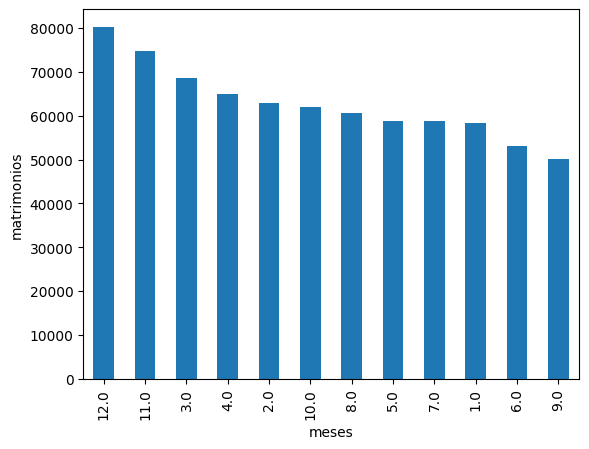

In [94]:
df['MESOCU'].value_counts().plot(kind='bar')
plt.xlabel('meses')
plt.ylabel('matrimonios')
plt.show()



## Cantidad de matrimonios por departamento

In [95]:
df['DEPOCU'].value_counts()

1.0     155662
13.0     57722
16.0     51764
12.0     50156
14.0     48221
9.0      45505
4.0      37307
5.0      36171
10.0     34016
8.0      26716
22.0     24433
17.0     22202
3.0      21476
7.0      20612
11.0     19184
6.0      18385
20.0     17242
18.0     16804
15.0     14454
21.0     14254
19.0     12290
2.0       8601
Name: DEPOCU, dtype: int64

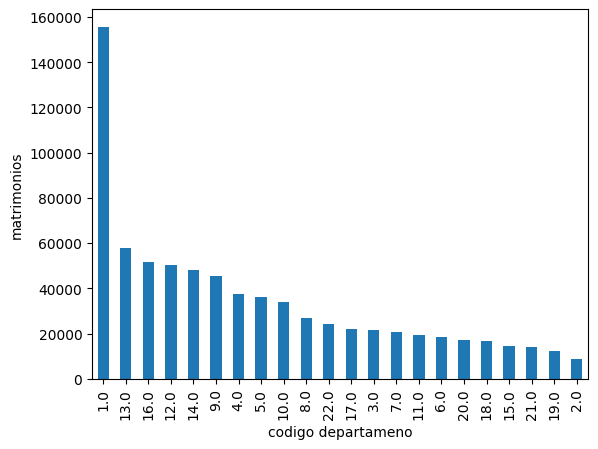

In [96]:
df['DEPOCU'].value_counts().plot(kind='bar')
plt.xlabel('codigo departameno')
plt.ylabel('matrimonios')
plt.show()


In [97]:
# Reemplazar los valores numéricos por etiquetas
df['CLAUNI'] = df['CLAUNI'].replace({1: 'Comunidad absoluta',
                                     2: 'Separación absoluta',
                                     3: 'Comunidad de gananciales',
                                     9: 'No especificado'})


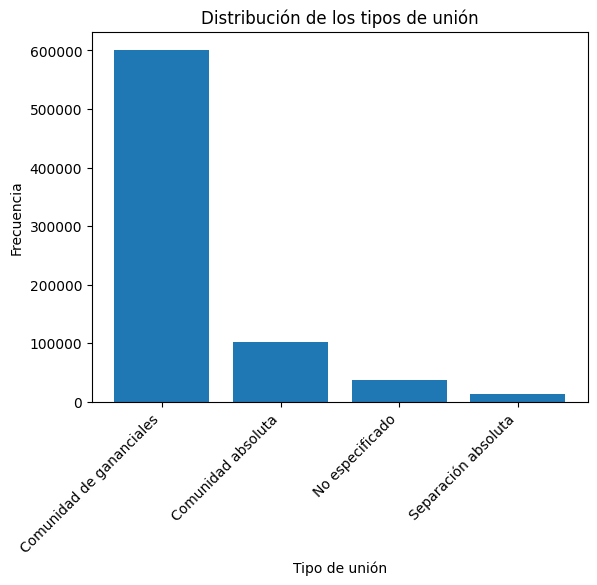

In [98]:
counts = df['CLAUNI'].value_counts()

# Crear un gráfico de barras
plt.bar(counts.index, counts.values)

# Rotar los nombres de las etiquetas
plt.xticks(rotation=45, ha='right')

# Agregar etiquetas y título
plt.xlabel('Tipo de unión')
plt.ylabel('Frecuencia')
plt.title('Distribución de los tipos de unión')


# Mostrar la gráfica
plt.show()

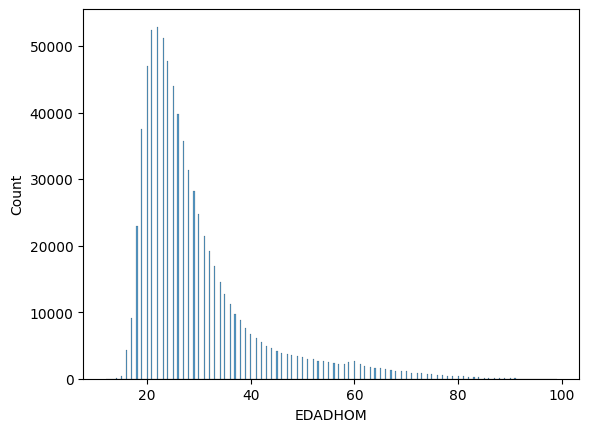

In [99]:

# Filtrar los valores que no son iguales a 999
edad_sin_999 = df.loc[df['EDADHOM'] != 999, 'EDADHOM']

# Crear una gráfica de distribución de la columna "edad" sin los valores de 999
sns.histplot(edad_sin_999)

# Mostrar la gráfica
plt.show()


In [ ]:

# Filtrar los valores que no son iguales a 999
edad_sin_999 = df.loc[df['EDADMUJ'] != 999, 'EDADMUJ']

# Crear una gráfica de distribución de la columna "edad" sin los valores de 999
sns.histplot(edad_sin_999)

# Mostrar la gráfica
plt.show()